In [71]:
import numpy
from __future__ import print_function, division
import maxr

ImportError: cannot import name 'parameters'

In [72]:
def alpha(n):
    """ First-order integration coefficients for history term
    """
    # Left boundary
    alpha = numpy.empty(n + 1)
    alpha[0] = 1
    
    # Middle
    js = numpy.arange(1, n)
    alpha[1:-1] = (js-1) ** (3/2) + (js+1) ** (3/2) - 2 * js ** (3/2)
        
    # Right boundary
    alpha[-1] = (n-1) ** (3/2) - n ** (3/2) + 6/4 * n ** (1/2)
    return 4/3 * alpha

def beta(n):
    """ Second-order integration coefficnts for history term
    """
    # Some contants
    r2, r3 = numpy.sqrt(2), numpy.sqrt(3)
    
    # First couple have to be handled specially
    if n < 2:
        raise ValueError("n must be greated than 2 for a second-order scheme")
    elif n == 2:
        beta = numpy.array([12, 16, 2]) * numpy.sqrt(2)/15
    elif n == 3:
        beta = numpy.array([2 * r2, 7 * r3 - 6 * r2, 
                            -4 * r3 + 6 * r2, 2 * r3 - 2 * r2]) * 2/5
    else:
        # Left boundary
        beta = numpy.empty(n + 1)
        beta[0] = 4 / 5 * r2
        beta[1] = 14 / 5 * r3 - 12 / 5 * r2
        beta[2] = 176 / 15 - 42 / 5 * r3 + 12 / 5 * r2

        # Middle
        js = numpy.arange(3, n - 1)
        beta[3:-2] = 8/15 * ((js+2) ** (5/2) - 3 * (js+1) ** (5/2) + 3 * js ** (5/2) - (js-1) ** (5/2)) \
                   + 2/3 * (-(js+2) ** (3/2) + 3 * (js+1) ** (3/2) - 3 * js ** (3/2) + (js-1) ** (3/2))

        # Right boundary
        beta[-2] = 8/15 * (-2 * n ** (5/2) + 3 * (n-1) ** (5/2) - (n-2) ** (5/2)) \
                   + 2/3 * (4 * n ** (3/2) - 3 * (n-1) ** (3/2) + (n-2) ** (3/2))
        beta[-1] = 8/15 * (n ** (5/2) - (n-1) ** (5/2)) \
                   + 2/3 * (-3 * n ** (3/2) + (n-1) ** (3/2)) + 2 * n ** (1/2)
    return beta

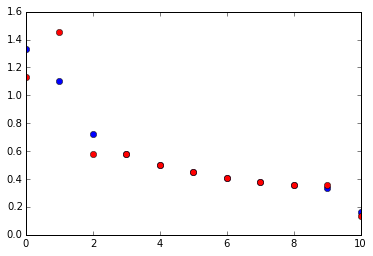

In [69]:
n = 10
plot(alpha(n), 'ob')
plot(beta(n), 'or')

ValueError: Unknown scale type 'semilog'

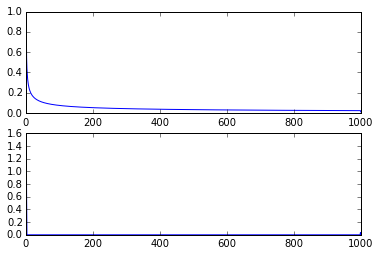

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 1)
ax[0].plot(alpha(1000))
ax[1].plot(beta(1000))
for a in ax:
    a.set_yscale('semilog')